# Real Hardware Fitting

In [3]:
import sys
sys.path.insert(0, '../../src_tf/')

import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import random
import pickle

from qiskit.quantum_info import DensityMatrix
from qiskit.quantum_info import Operator
from scipy.linalg import sqrtm
from tqdm.notebook import tqdm

from loss_functions import *
from optimization import *
from quantum_maps import *
from quantum_tools import *
from experiments import *

#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=4)

#import os
#os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

## Expectation Value

## Two Qubit POVM with Trace

In [1]:
def variational_circuit(n):
    theta = np.random.uniform(-np.pi, np.pi, 4*n)
    circuit = qk.QuantumCircuit(n)
    for i, angle in enumerate(theta[:n]):
        circuit.ry(angle, i)
    
    for i, angle in enumerate(theta[n:2*n]):
        circuit.crx(angle, i, (i+1)%n)
        
    #for i, angle in enumerate(theta[2*n:3*n]):
    #    circuit.ry(angle, i)
        
    #for i, angle in enumerate(theta[3*n:]):
    #    circuit.crx(angle, (n-i)%n, n-i-1)
    
    return circuit

In [4]:
n = 2
d = 2**n
inputs, counts_list = pickle.load(open("../../data/twoQubits_expectation_POVM.p", "rb"))
counts_error = counts_list[-d**2:]
corr_mat = sum([generate_corruption_matrix(counts_error[d*i:d*(i+1)]) for i in range(d)])/d
povm = corr_mat_to_povm(corr_mat)

targets = counts_to_probs(counts_list[:324])
rank = d**2

np.random.seed(42)
random.seed(42)

kraus_model = KrausMap(
                       d = d, 
                       rank = rank,
                       povm = povm,
                       )

model = ModelQuantumMap(
                        q_map = kraus_model,
                        loss = probs_loss,
                        optimizer = tf.optimizers.Adam(learning_rate=0.01),
                        )

ValueError: too many values to unpack (expected 2)

In [12]:
targets = counts_to_probs(counts_list[:324])

In [13]:
n = 2
d = 2**n
rank = d**2
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

circuit_target = variational_circuit(n).reverse_bits()
U = Operator(circuit_target).data

np.random.seed(42)
random.seed(42)

kraus_model = KrausMap(
#                       U = U,
#                       c = 0.9,
                       d = d, 
                       rank = rank,
                       povm = povm,
                       )

model = ModelQuantumMap(
                        q_map = kraus_model,
                        loss = probs_loss,
                        optimizer = tf.optimizers.Adam(learning_rate=0.01),
                        )

In [14]:
model.train(inputs = inputs,
            targets = targets,
            inputs_val = inputs,
            targets_val = targets,
            num_iter = 1000,
            N = 324
            )

  0%|          | 0/1000 [00:00<?, ?it/s]

0 0.50410855
1 0.49830082
2 0.4924834
3 0.48665935
4 0.4808284
5 0.47499192
6 0.4691554
7 0.46331882
8 0.45748138
9 0.4516449
10 0.44580948
11 0.43998006
12 0.43414447
13 0.42831865
14 0.42250094
15 0.4166872
16 0.41088405
17 0.40508658
18 0.3993056
19 0.39353892
20 0.38778898
21 0.38205954
22 0.3763522
23 0.37066802
24 0.36501125
25 0.35937262
26 0.3537606
27 0.3481735
28 0.34262565
29 0.33709925
30 0.33160895
31 0.3261576
32 0.32074723
33 0.31537995
34 0.31005022
35 0.3047625
36 0.29950577
37 0.29428473
38 0.28910893
39 0.28397408
40 0.27888596
41 0.2738385
42 0.2688413
43 0.2638961
44 0.25900388
45 0.25416002
46 0.2493653
47 0.24462096
48 0.23992397
49 0.23528042
50 0.23069026
51 0.22615685
52 0.22168091
53 0.21725751
54 0.2128894
55 0.20857328
56 0.2043078
57 0.20010154
58 0.19595453
59 0.1918624
60 0.1878291
61 0.18385454
62 0.17993966
63 0.17607698
64 0.17227614
65 0.16853073
66 0.1648403
67 0.16121031
68 0.1576266
69 0.15410247
70 0.15063502
71 0.14722423
72 0.14385678
73 0.1405

517 0.0023045605
518 0.0023023158
519 0.002300084
520 0.0022978727
521 0.0022956743
522 0.0022934943
523 0.0022913287
524 0.00228918
525 0.0022870463
526 0.0022849287
527 0.0022828267
528 0.0022807405
529 0.002278671
530 0.0022766122
531 0.002274575
532 0.0022725475
533 0.0022705349
534 0.002268541
535 0.0022665593
536 0.0022645902
537 0.002262638
538 0.0022606975
539 0.002258771
540 0.002256857
541 0.002254958
542 0.0022530765
543 0.0022511994
544 0.0022493398
545 0.0022474923
546 0.0022456588
547 0.002243837
548 0.0022420294
549 0.0022402313
550 0.0022384466
551 0.0022366766
552 0.002234917
553 0.0022331686
554 0.0022314345
555 0.002229711
556 0.0022279976
557 0.0022262959
558 0.0022246062
559 0.0022229294
560 0.0022212605
561 0.0022196055
562 0.0022179598
563 0.0022163265
564 0.0022147007
565 0.0022130886
566 0.0022114853
567 0.0022098944
568 0.002208311
569 0.0022067397
570 0.0022051798
571 0.0022036259
572 0.0022020852
573 0.0022005548
574 0.0021990335
575 0.0021975213
576 0.00219

In [15]:
state_unitary = state_model = np.zeros((1, d, d))
state_unitary[0, 0, 0] = 1

state_unitary = tf.cast(state_unitary, dtype=tf.complex64)[0]
state_model = tf.cast(state_model, dtype=tf.complex64)

observ = np.zeros((1, d))
observ[0, 0] = 1
observ = tf.cast(observ, dtype=tf.complex64)
model_expectation_list = []
unitary_expectation_list = []


probs = counts_to_probs(counts_list[324:-d**2])
                        
target_test = expectation_value(probs, observ).numpy()

for i in range(20):
    state_model = model.q_map.apply_map(state_model)
    probs = measurement(state_model, povm=model.q_map.povm)
    model_expectation_list.append(expectation_value(probs, observ))
    
    state_unitary = U@state_unitary@U.T.conj()
    unitary_expectation_list.append(expectation_value(measurement(state_unitary, povm=model.q_map.povm), observ))

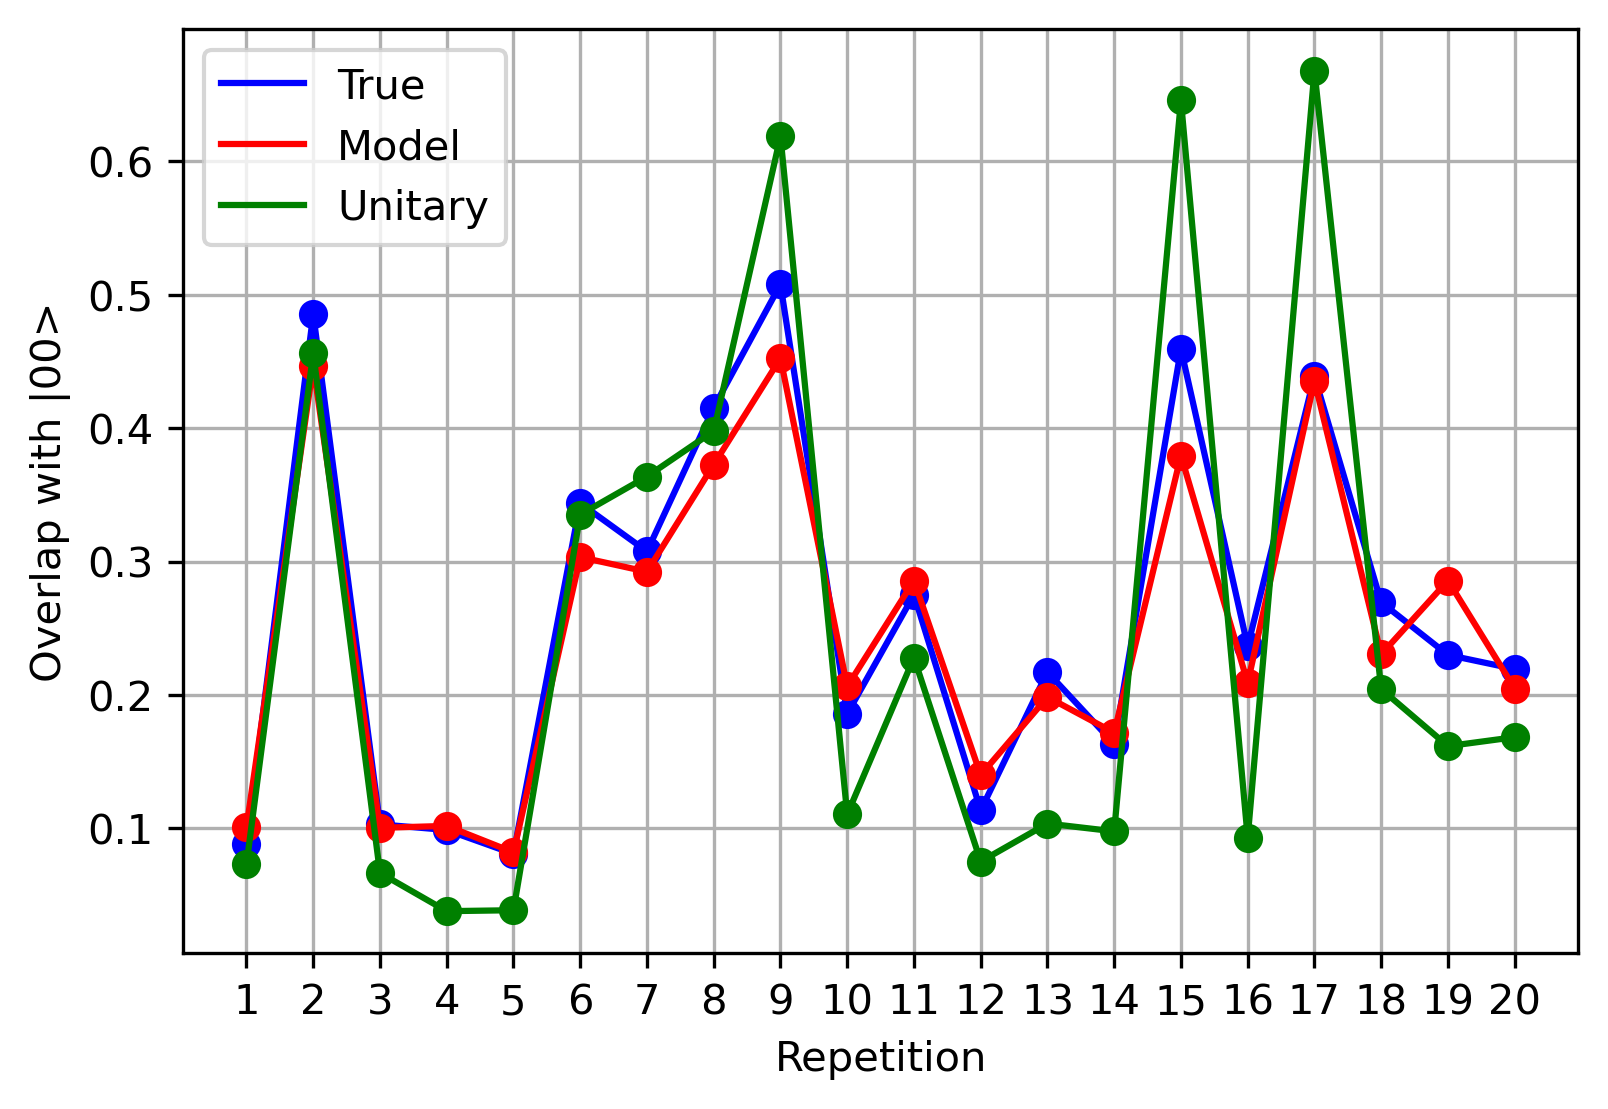

In [16]:
fig=plt.figure(figsize=(6,4), dpi = 300, facecolor='w', edgecolor='k')
x = list(range(1,21))
plt.plot(x, target_test, "b-",  label="True")
plt.plot(x, target_test, "bo")

plt.plot(x, model_expectation_list, "r-", label="Model")
plt.plot(x, model_expectation_list, "ro")

plt.plot(x, unitary_expectation_list, "g-", label="Unitary")
plt.plot(x, unitary_expectation_list, "go")
plt.xlabel("Repetition")
plt.ylabel("Overlap with |00>")

plt.xticks(list(range(1,21)))
plt.legend()
plt.grid()
plt.show()

## Three Qubits 

In [49]:
n = 3
d = 2**n
inputs, counts_list = pickle.load(open("../../data/threeQubits_expectation_POVM.p", "rb"))
counts_error = counts_list[-d**2:]
corr_mat = sum([generate_corruption_matrix(counts_error[d*i:d*(i+1)]) for i in range(d)])/d
povm = corr_mat_to_povm(corr_mat)

targets = counts_to_probs(counts_list[:5000])
rank = d**2

np.random.seed(42)
random.seed(42)

kraus_model = KrausMap(
                       d = d, 
                       rank = rank,
                       povm = povm,
                       )

model = ModelQuantumMap(
                        q_map = kraus_model,
                        loss = probs_loss,
                        optimizer = tf.optimizers.Adam(learning_rate=0.01),
                        )

In [50]:
model.train(inputs = inputs,
            targets = targets,
            inputs_val = inputs,
            targets_val = targets,
            num_iter = 1000,
            N = 500
            )

0 0.6334783
1 0.62229866
2 0.58697975
3 0.6201013
4 0.59580785
5 0.5583222
6 0.5741947
7 0.5662849
8 0.5652545
9 0.54923147
10 0.54576325
11 0.5164614
12 0.5322416
13 0.52882123
14 0.5082511
15 0.4973467
16 0.52540076
17 0.52173376
18 0.4854331
19 0.5297862
20 0.47703883
21 0.46860686
22 0.46531102
23 0.46533063
24 0.4556922
25 0.4515039
26 0.4453573
27 0.45313087
28 0.4207382
29 0.4552005
30 0.41239792
31 0.40514934
32 0.3793903
33 0.4029679
34 0.4034027
35 0.41820318
36 0.3863616
37 0.38430798
38 0.38176516
39 0.38945422
40 0.3658583
41 0.38959393
42 0.36984077
43 0.37340567
44 0.36407104
45 0.36791143
46 0.35089362
47 0.35027933
48 0.32428443
49 0.3296522
50 0.3318921
51 0.30041662
52 0.32969612
53 0.3114366
54 0.2864896
55 0.29725567
56 0.30209613
57 0.28160003
58 0.2998028
59 0.27479017
60 0.25668028
61 0.26548383
62 0.26863855
63 0.25000474
64 0.24356586
65 0.24170889
66 0.23535094
67 0.23872809
68 0.23020281
69 0.23332389
70 0.22812785
71 0.21342617
72 0.2164581
73 0.19321543
74

985 0.0007182282
986 0.0007485677
987 0.00073919457
988 0.00076623017
989 0.00073245546
990 0.0007445579
991 0.00075894856
992 0.0007566657
993 0.00076275243
994 0.00073658815
995 0.00074944337
996 0.00075676333
997 0.00075430237
998 0.00075318065
999 0.00074776064



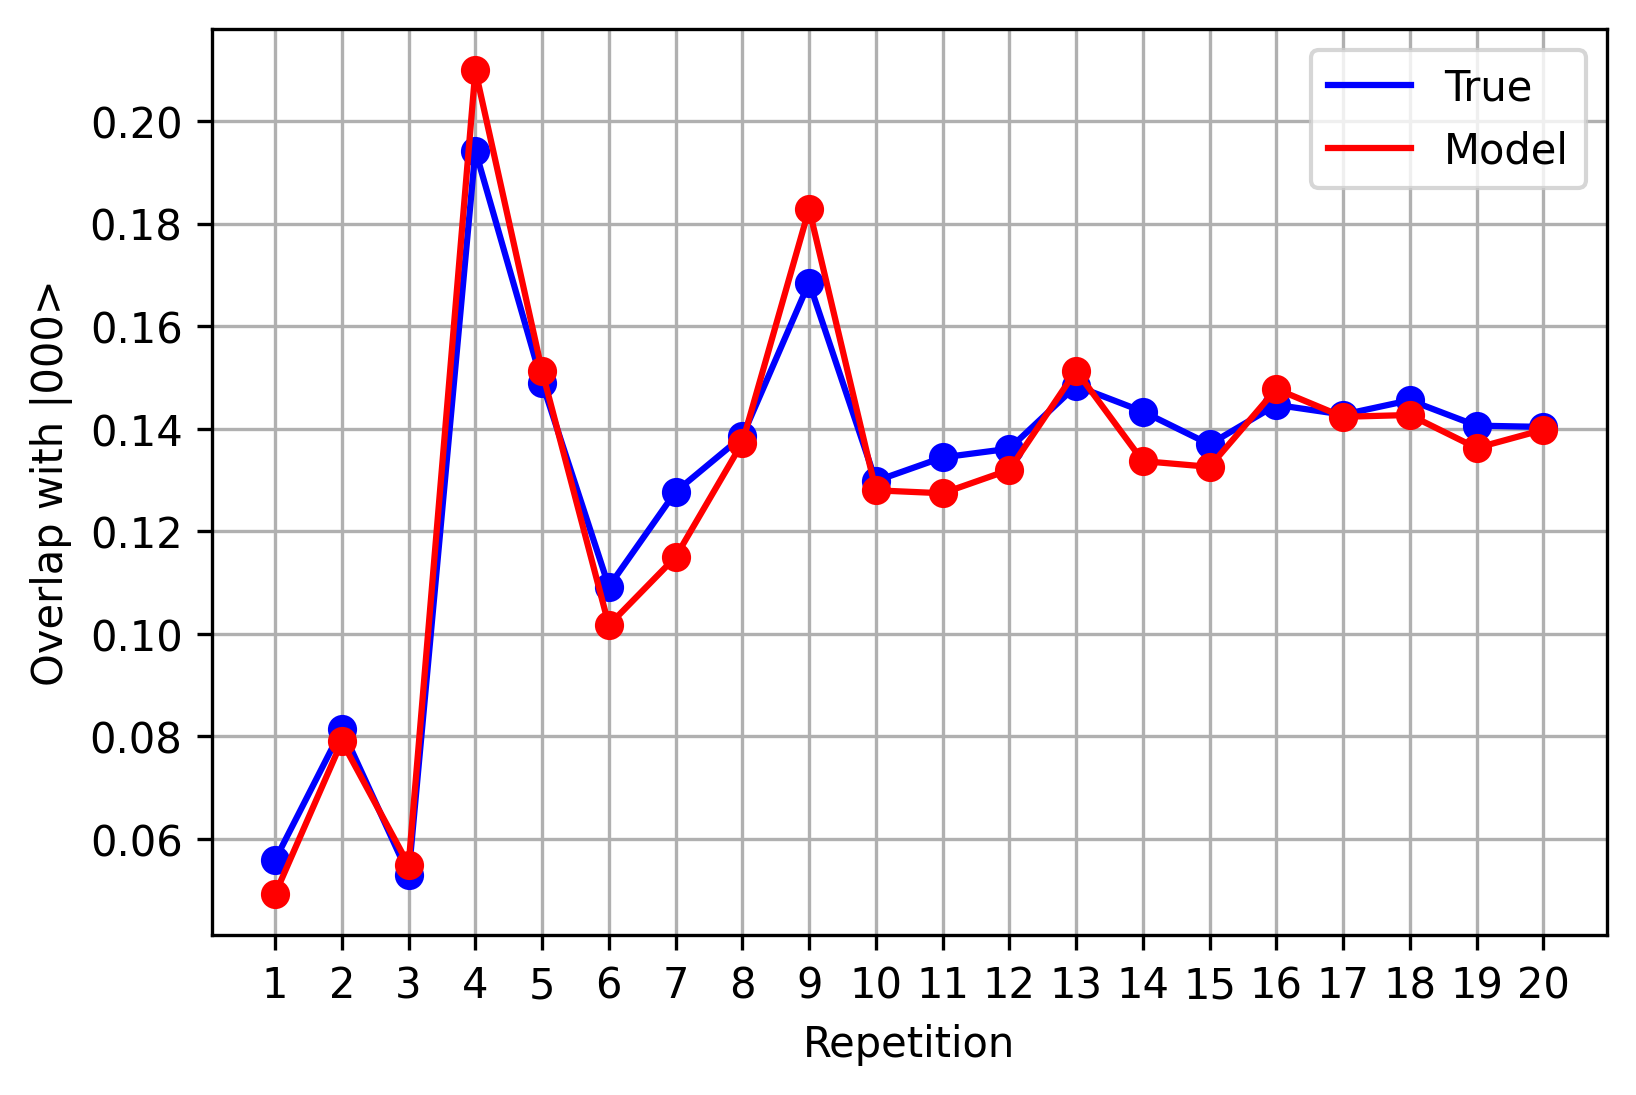

In [24]:
state_unitary = state_model = np.zeros((1, d,d))
state_unitary[0, 0, 0] = 1

state_unitary = tf.cast(state_unitary, dtype=tf.complex64)
state_model = tf.cast(state_model, dtype=tf.complex64)

observ = np.zeros((1, d))
observ[0, 0] = 1
observ = tf.cast(observ, dtype=tf.complex64)
model_expectation_list = []
unitary_expectation_list = []


probs = counts_to_probs(counts_list[5000:-d**2])
                        
target_test = expectation_value(probs, observ).numpy()

for i in range(20):
    state_model = model.q_map.apply_map(state_model)
    probs = measurement(state_model, povm=model.q_map.povm)
    model_expectation_list.append(expectation_value(probs, observ))
    
fig=plt.figure(figsize=(6,4), dpi = 300, facecolor='w', edgecolor='k')
x = list(range(1,21))
plt.plot(x, target_test, "b-",  label="True")
plt.plot(x, target_test, "bo")

plt.plot(x, model_expectation_list, "r-", label="Model")
plt.plot(x, model_expectation_list, "ro")

#plt.plot(x, unitary_expectation_list, "g-", label="Unitary")
#plt.plot(x, unitary_expectation_list, "go")
plt.xlabel("Repetition")
plt.ylabel("Overlap with |000>")

plt.xticks(list(range(1,21)))
plt.legend()
plt.grid()
plt.show()

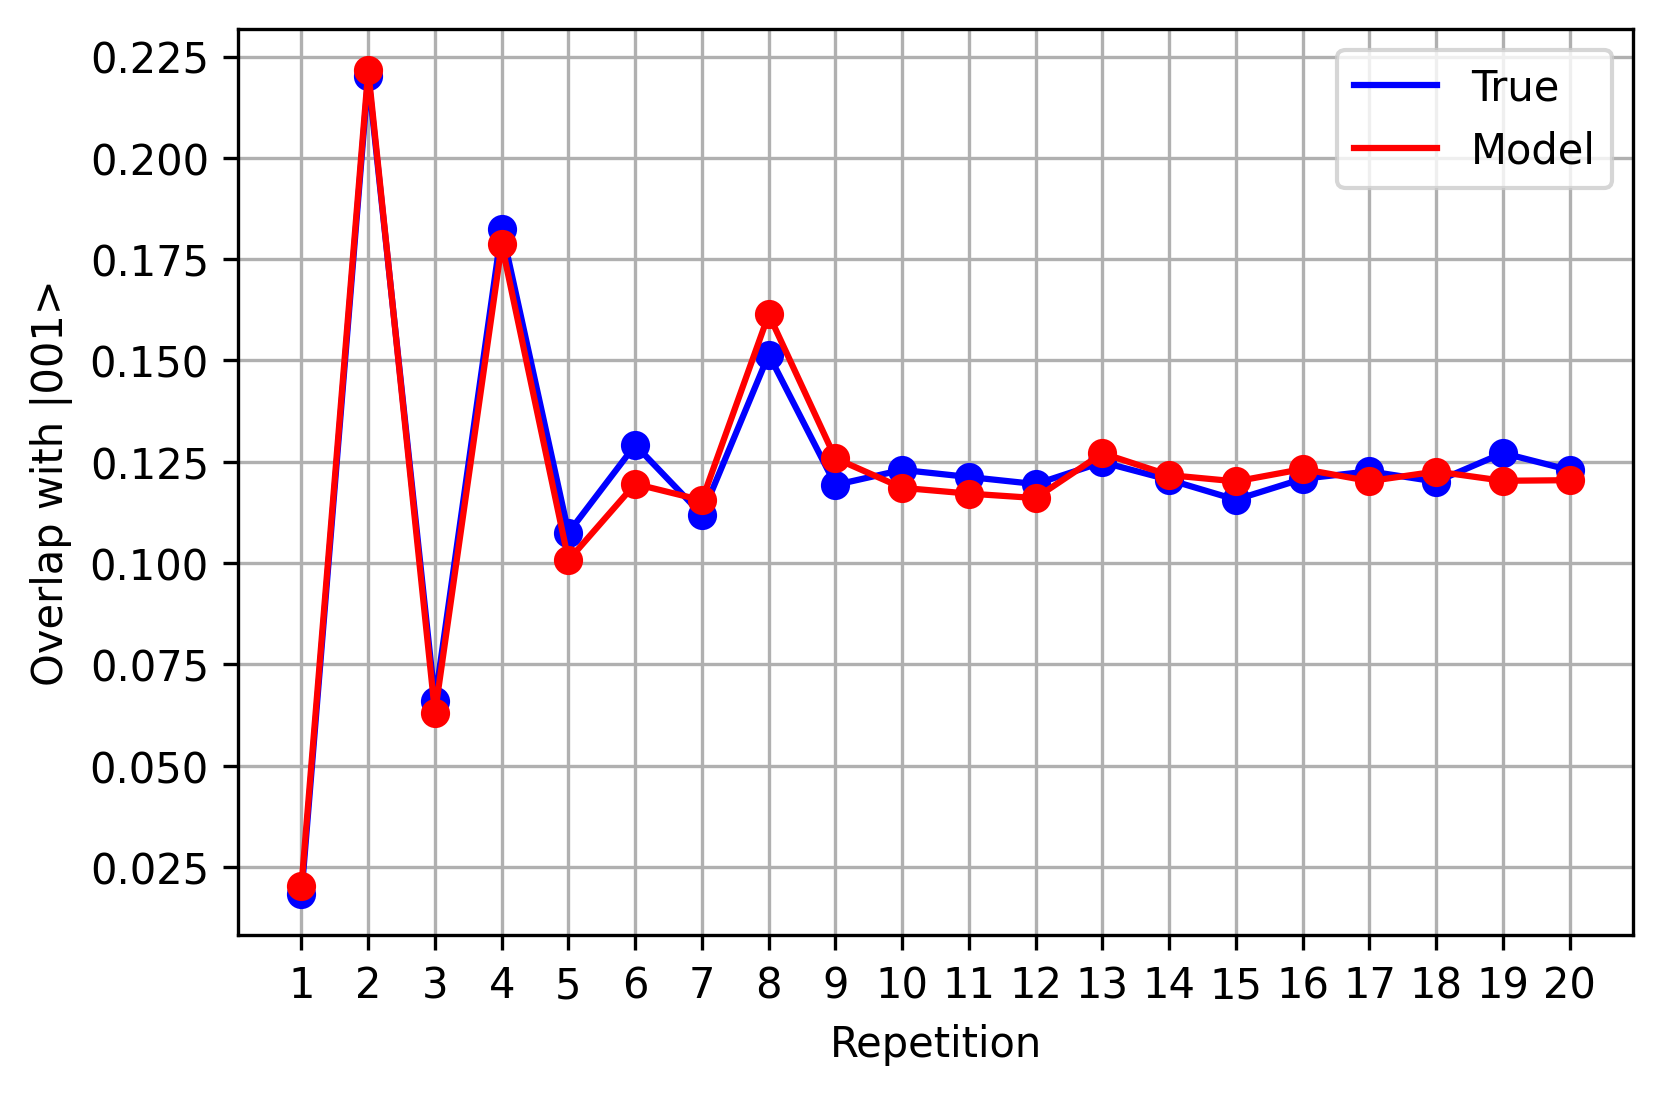

In [25]:
state_unitary = state_model = np.zeros((1, d,d))
state_unitary[0, 0, 0] = 1

state_unitary = tf.cast(state_unitary, dtype=tf.complex64)
state_model = tf.cast(state_model, dtype=tf.complex64)

observ = np.zeros((1, d))
observ[0, 1] = 1
observ = tf.cast(observ, dtype=tf.complex64)
model_expectation_list = []
unitary_expectation_list = []


probs = counts_to_probs(counts_list[5000:-d**2])
                        
target_test = expectation_value(probs, observ).numpy()

for i in range(20):
    state_model = model.q_map.apply_map(state_model)
    probs = measurement(state_model, povm=model.q_map.povm)
    model_expectation_list.append(expectation_value(probs, observ))
    
fig=plt.figure(figsize=(6,4), dpi = 300, facecolor='w', edgecolor='k')
x = list(range(1,21))
plt.plot(x, target_test, "b-",  label="True")
plt.plot(x, target_test, "bo")

plt.plot(x, model_expectation_list, "r-", label="Model")
plt.plot(x, model_expectation_list, "ro")

#plt.plot(x, unitary_expectation_list, "g-", label="Unitary")
#plt.plot(x, unitary_expectation_list, "go")
plt.xlabel("Repetition")
plt.ylabel("Overlap with |001>")

plt.xticks(list(range(1,21)))
plt.legend()
plt.grid()
plt.show()

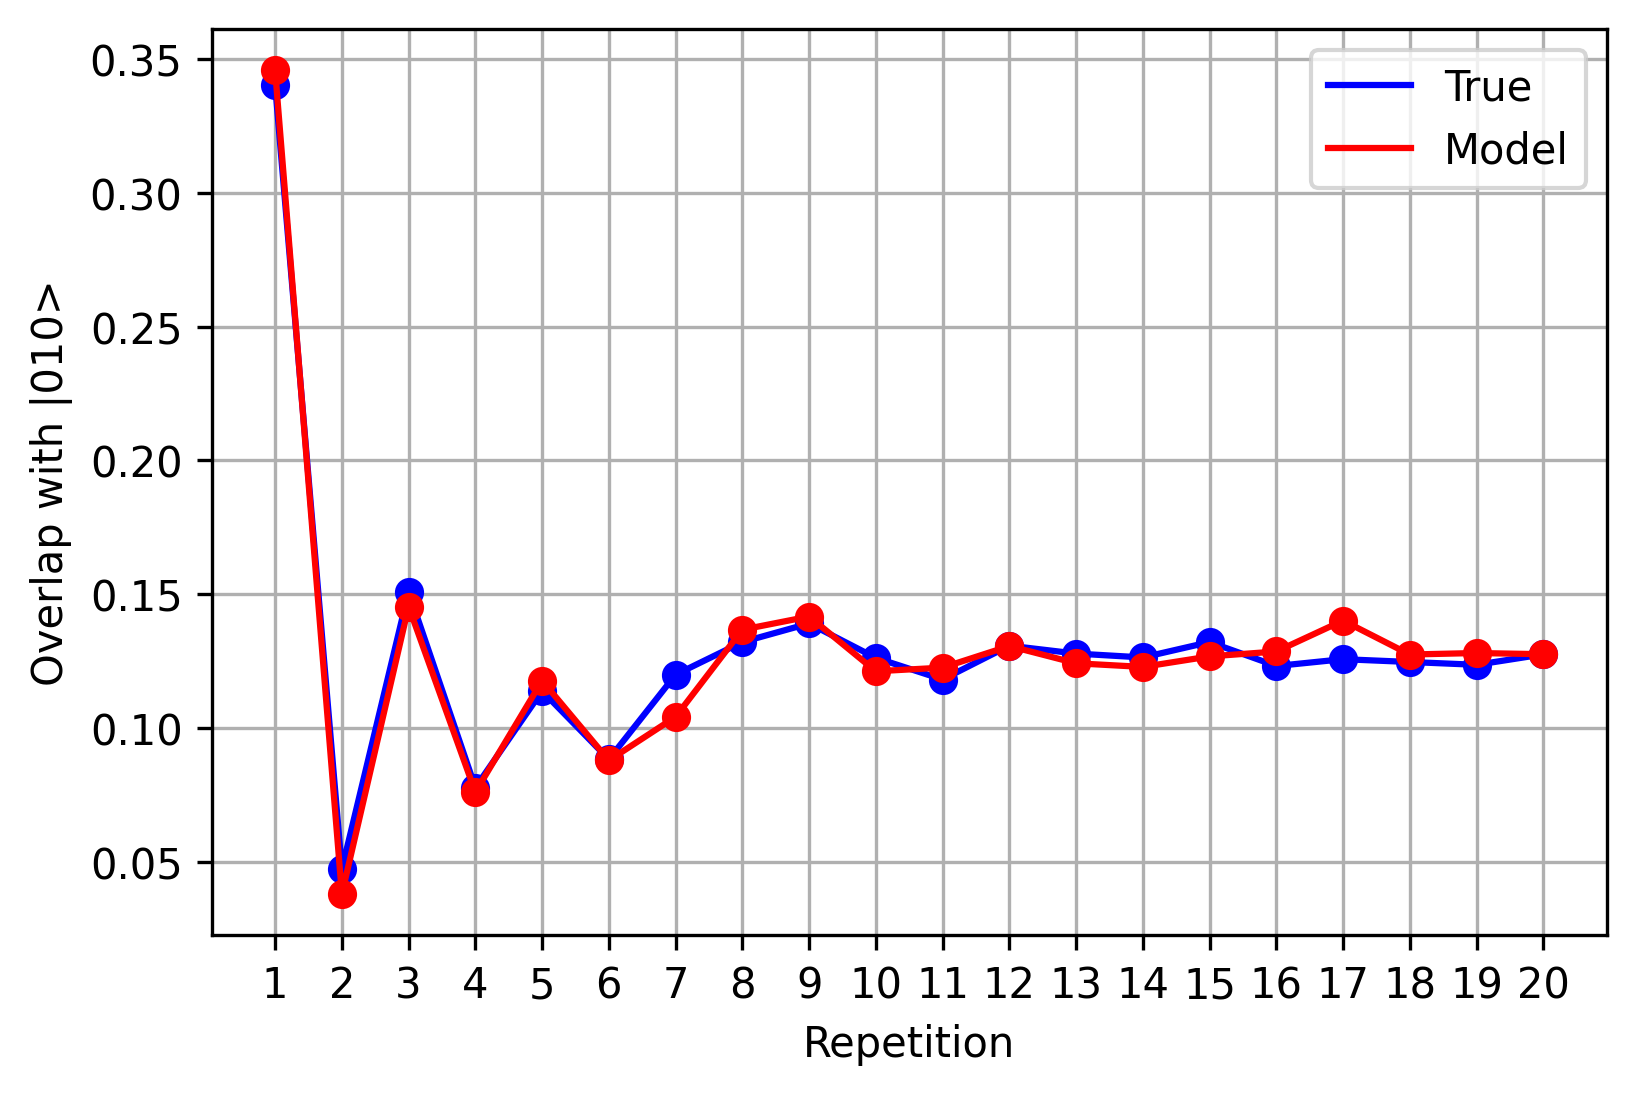

In [26]:
state_unitary = state_model = np.zeros((1, d,d))
state_unitary[0, 0, 0] = 1

state_unitary = tf.cast(state_unitary, dtype=tf.complex64)
state_model = tf.cast(state_model, dtype=tf.complex64)

observ = np.zeros((1, d))
observ[0, 2] = 1
observ = tf.cast(observ, dtype=tf.complex64)
model_expectation_list = []
unitary_expectation_list = []

probs = counts_to_probs(counts_list[5000:-d**2])
                        
target_test = expectation_value(probs, observ).numpy()

for i in range(20):
    state_model = model.q_map.apply_map(state_model)
    probs = measurement(state_model, povm=model.q_map.povm)
    model_expectation_list.append(expectation_value(probs, observ))
    
fig=plt.figure(figsize=(6,4), dpi = 300, facecolor='w', edgecolor='k')
x = list(range(1,21))
plt.plot(x, target_test, "b-",  label="True")
plt.plot(x, target_test, "bo")

plt.plot(x, model_expectation_list, "r-", label="Model")
plt.plot(x, model_expectation_list, "ro")

#plt.plot(x, unitary_expectation_list, "g-", label="Unitary")
#plt.plot(x, unitary_expectation_list, "go")
plt.xlabel("Repetition")
plt.ylabel("Overlap with |010>")

plt.xticks(list(range(1,21)))
plt.legend()
plt.grid()
plt.show()

## Four Qubits

In [9]:
n = 4
d = 2**n
inputs, counts_list = pickle.load(open("../../data/fourQubits_expectation_POVM.p", "rb"))
counts_error = counts_list[-d**2:]
corr_mat = sum([generate_corruption_matrix(counts_error[d*i:d*(i+1)]) for i in range(d)])/d
povm = corr_mat_to_povm(corr_mat)

targets = counts_to_probs(counts_list[:10000])
rank = 16

np.random.seed(42)
random.seed(42)

kraus_model = KrausMap(
                       d = d, 
                       rank = rank,
                       povm = povm,
                       )

model = ModelQuantumMap(
                        q_map = kraus_model,
                        loss = probs_loss,
                        optimizer = tf.optimizers.Adam(learning_rate=0.01),
                        )

In [10]:
model.train(inputs = inputs,
            targets = targets,
            inputs_val = None,
            targets_val = None,
            num_iter = 1000,
            N = 5000
            )

  0%|          | 0/1000 [00:00<?, ?it/s]

0 0.6399741
1 0.6389576
2 0.6352866
3 0.6260781
4 0.63210535
5 0.6205789
6 0.614908
7 0.6040091
8 0.61736035
9 0.6076142
10 0.6023034
11 0.5887594
12 0.5948284
13 0.58838165
14 0.58190304
15 0.57884103
16 0.5747487
17 0.5590142
18 0.5621957
19 0.5556881
20 0.54731894
21 0.54250175
22 0.53458345
23 0.5380179
24 0.5314019
25 0.5200613
26 0.5216585
27 0.52012163
28 0.51017386
29 0.49536335
30 0.50201476
31 0.49298456
32 0.48947382
33 0.47775355
34 0.4762575
35 0.47018343
36 0.46780878
37 0.46348652
38 0.45862684
39 0.44875428
40 0.44453818
41 0.4438075
42 0.43562117
43 0.4258621
44 0.41790798
45 0.41820902
46 0.4106359
47 0.40677828
48 0.39758542
49 0.39388514
50 0.38835928
51 0.38120556
52 0.3782625
53 0.37438846
54 0.36738762
55 0.36121443
56 0.35650465
57 0.34766057
58 0.34475955
59 0.33862442
60 0.3321897
61 0.3213511
62 0.3198299
63 0.31073827
64 0.31020653
65 0.30121747
66 0.299354
67 0.29426244
68 0.28675014
69 0.2794068
70 0.27718318
71 0.2703459
72 0.26527262
73 0.26113364
74 0.2

KeyboardInterrupt: 

In [ ]:
state_unitary = state_model = np.zeros((1, d,d))
state_unitary[0, 0, 0] = 1

state_unitary = tf.cast(state_unitary, dtype=tf.complex64)
state_model = tf.cast(state_model, dtype=tf.complex64)

observ = np.zeros((1, d))
observ[0, 1] = 1
observ = tf.cast(observ, dtype=tf.complex64)
model_expectation_list = []
unitary_expectation_list = []


probs = counts_to_probs(counts_list[5000:-d**2])
                        
target_test = expectation_value(probs, observ).numpy()

for i in range(20):
    state_model = model.q_map.apply_map(state_model)
    probs = measurement(state_model, povm=model.q_map.povm)
    model_expectation_list.append(expectation_value(probs, observ))
    
fig=plt.figure(figsize=(6,4), dpi = 300, facecolor='w', edgecolor='k')
x = list(range(1,21))
plt.plot(x, target_test, "b-",  label="True")
plt.plot(x, target_test, "bo")

plt.plot(x, model_expectation_list, "r-", label="Model")
plt.plot(x, model_expectation_list, "ro")

#plt.plot(x, unitary_expectation_list, "g-", label="Unitary")
#plt.plot(x, unitary_expectation_list, "go")
plt.xlabel("Repetition")
plt.ylabel("Overlap with |001>")

plt.xticks(list(range(1,21)))
plt.legend()
plt.grid()
plt.show()

## Two Qubits, Two Blocks

In [ ]:
n = 3
d = 2**n
inputs, counts_list = pickle.load(open("../../data/twoQubits_twoBlocks.p", "rb"))
counts_error = counts_list[-d**2:]
corr_mat = sum([generate_corruption_matrix(counts_error[d*i:d*(i+1)]) for i in range(d)])/d
povm = corr_mat_to_povm(corr_mat)

targets = counts_to_probs(counts_list[:5000])
rank = 8

np.random.seed(42)
random.seed(42)

kraus_model = KrausMap(
                       d = d, 
                       rank = rank,
                       povm = povm,
                       )

model = ModelQuantumMap(
                        q_map = kraus_model,
                        loss = probs_loss,
                        optimizer = tf.optimizers.Adam(learning_rate=0.01),
                        )

In [ ]:
target_list = []
input_list_ = []
for input, counts in zip(input_list, counts_list):
    target_list.append(counts_to_probs(counts))
    state, U_basis, obs = input
    input_list_.append([tf.cast(state, dtype=tf.complex64), tf.cast(U_basis, dtype=tf.complex64), obs])

input_list = input_list_

input_train1, input_train2 = input_list[:324], input_list[324:]
target_train1, target_train2 = target_list[:324], target_list[324:]

In [ ]:
rank = 8
np.random.seed(42)
random.seed(42)


kraus_model1 = KrausMap(
#                       U = U,
#                       c = 0.9,
                       d = d, 
                       rank = rank,
                       povm = povm,
                       )

model1 = ModelQuantumMap(
                        q_map = kraus_model1,
                        loss = probs_loss,
                        input_list = input_train1,
                        target_list = target_train1,
                        input_val_list = input_train1,
                        target_val_list = target_train1,
                        optimizer = tf.optimizers.Adam(learning_rate=0.05),
                        )

kraus_model2 = KrausMap(
#                       U = U,
#                       c = 0.9,
                       d = d, 
                       rank = rank,
                       povm = povm,
                       )

model2 = ModelQuantumMap(
                        q_map = kraus_model2,
                        loss = probs_loss,
                        input_list = input_train2,
                        target_list = target_train2,
                        input_val_list = input_train2,
                        target_val_list = target_train2,
                        optimizer = tf.optimizers.Adam(learning_rate=0.05),
                        )

In [ ]:
model1.train(num_iter = 200,
             N = 50
            )

In [ ]:
model2.train(num_iter = 200,
             N = 50
            )

In [ ]:
state = np.zeros((d,d))
state[0,0] = 1
state = tf.cast(state, dtype=tf.complex64)

observ = np.zeros(d)
observ[0] = 1
observ = tf.cast(observ, dtype=tf.complex64)

state = model1.q_map.apply_map(state)
state = model2.q_map.apply_map(state)
probs_model = np.abs(measurement(state, povm = povm).numpy())

probs_true = counts_to_probs(counts_list[2*324])

print("Model:", probs_model)
print("True:", probs_true)

## Three Qubits, Two Blocks

In [ ]:
n = 3
d = 2**n
input_list, counts_list = pickle.load(open("../../data/threeQubits_twoBlocks.p", "rb"))
counts_error = counts_list[-d**2:]
corr_mat = sum([generate_corruption_matrix(counts_error[d*i:d*(i+1)]) for i in range(d)])/d
povm = corr_mat_to_povm(corr_mat)
print(sum(povm))
print(corr_mat)

In [ ]:
target_list = []
input_list_ = []
for input, counts in zip(input_list, counts_list):
    target_list.append(counts_to_probs(counts))
    state, U_basis, obs = input
    input_list_.append([tf.cast(state, dtype=tf.complex64), tf.cast(U_basis, dtype=tf.complex64), obs])

input_list = input_list_

input_train1, input_train2 = input_list[:1000], input_list[1000:]
target_train1, target_train2 = target_list[:1000], target_list[1000:]

In [ ]:
rank = 16
np.random.seed(42)
random.seed(42)


kraus_model1 = KrausMap(
#                       U = U,
#                       c = 0.9,
                       d = d, 
                       rank = rank,
                       povm = povm,
                       )

model1 = ModelQuantumMap(
                        q_map = kraus_model1,
                        loss = probs_loss,
                        input_list = input_train1,
                        target_list = target_train1,
                        input_val_list = input_train1[:100],
                        target_val_list = target_train1[:100],
                        optimizer = tf.optimizers.Adam(learning_rate=0.05),
                        )

kraus_model2 = KrausMap(
#                       U = U,
#                       c = 0.9,
                       d = d, 
                       rank = rank,
                       povm = povm,
                       )

model2 = ModelQuantumMap(
                        q_map = kraus_model2,
                        loss = probs_loss,
                        input_list = input_train2,
                        target_list = target_train2,
                        input_val_list = input_train2[:100],
                        target_val_list = target_train2[:100],
                        optimizer = tf.optimizers.Adam(learning_rate=0.05),
                        )

In [ ]:
model1.train(num_iter = 200,
             N = 50
            )

In [ ]:
model2.train(num_iter = 200,
             N = 50
            )

In [ ]:
state = np.zeros((d,d))
state[0,0] = 1
state = tf.cast(state, dtype=tf.complex64)

observ = np.zeros(d)
observ[0] = 1
observ = tf.cast(observ, dtype=tf.complex64)

state = model1.q_map.apply_map(state)
state = model2.q_map.apply_map(state)
probs_model = np.abs(measurement(state, povm = povm).numpy())

probs_true = counts_to_probs(counts_list[2*1000])

print("Model:", probs_model)
print("True:", probs_true)

## Optimize POVM

In [12]:
def variational_circuit(n):
    theta = np.random.uniform(-np.pi, np.pi, 4*n)
    circuit = qk.QuantumCircuit(n)
    for i, angle in enumerate(theta[:n]):
        circuit.ry(angle, i)
    
    for i, angle in enumerate(theta[n:2*n]):
        circuit.crx(angle, i, (i+1)%n)
        
    #for i, angle in enumerate(theta[2*n:3*n]):
    #    circuit.ry(angle, i)
        
    #for i, angle in enumerate(theta[3*n:]):
    #    circuit.crx(angle, (n-i)%n, n-i-1)
    
    return circuit

In [5]:
n = 2
d = 2**n
inputs, counts_list, povm_inputs, counts_povm_list = pickle.load(open("../../data/twoQubits_expectation_POVM.p", "rb"))
targets = counts_to_probs(counts_list[:324])

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

U = Operator(variational_circuit(n).reverse_bits()).data



povm_targets = counts_to_probs(counts_povm_list)

povm_model = POVM(
                  d=d, 
                  optimizer = tf.optimizers.Adam(learning_rate=0.01)
                 )

In [6]:
povm_model.train(1000, povm_inputs, povm_targets, N = 36)

  0%|          | 0/1000 [00:00<?, ?it/s]

(0.8011154020557671-7.841336937443121e-18j)
(0.7854134978648792-1.5774207638011945e-17j)
(0.7697402886022565-1.6269363108589852e-17j)
(0.7541570516660867+2.859618814351046e-17j)
(0.7386657984555188+3.0416621893741044e-17j)
(0.7232799208705271+5.75614018667866e-17j)
(0.7079894215579722+3.163749814683519e-17j)
(0.6928532211195623-2.2038804458932313e-17j)
(0.677892071587225-4.106703573648502e-17j)
(0.663126758480154+3.492037899598216e-17j)
(0.6485773660078045-1.040707125246009e-17j)
(0.6342502662959169-5.044314979837727e-17j)
(0.62018656570925-2.563450538288996e-18j)
(0.6063991580473066+1.238470282156832e-17j)
(0.5928944069907475+3.5601467623481004e-17j)
(0.5796259591133243+1.515713945261184e-17j)
(0.5666356014047351+1.9888840809370146e-17j)
(0.5539324955275966+1.9366312378392388e-17j)
(0.5415226109133434+4.324887360752793e-17j)
(0.5293973142121687+1.3086657546710275e-17j)
(0.5175227833125305+1.5774051605446054e-18j)
(0.505811376120219-1.9932726633828036e-17j)
(0.4943187843385206+5.210595

(0.005834521523721674-3.980597103686134e-18j)
(0.005732210958359172+2.083020031814988e-18j)
(0.005632153189359318+2.3435375690357463e-18j)
(0.005534283512378615-5.4926402853286445e-18j)
(0.0054385416163154916+8.648546413703676e-18j)
(0.0053448711666682115-4.008017079222056e-18j)
(0.005253219370582433-5.150166240694226e-19j)
(0.005163536517227167+3.246944157476012e-18j)
(0.005075775494267404-6.4336827283993185e-19j)
(0.004989891289306026+6.278799043762392e-18j)
(0.004905840492590698-3.503840547129316e-18j)
(0.004823580822753609-1.3311438604345452e-18j)
(0.004743070699898816+4.533599866900726e-19j)
(0.004664268889600131-2.0710170700399647e-18j)
(0.004587134237370186-2.01887925318785e-19j)
(0.0045116255065221385-1.0724572351665208e-18j)
(0.004437701323990997-9.027869181380859e-19j)
(0.004365320229797+1.7306933809443351e-18j)
(0.004294440817609836-4.452583527522933e-19j)
(0.004225021947303993-1.5235554592006685e-18j)
(0.004157023006173656+9.311321105657482e-19j)
(0.004090404193861497+1.866

(0.0006286491016600991-6.882354329764842e-19j)
(0.0006229561607371727+7.634805478741548e-19j)
(0.0006173359910230591+3.2644261728010804e-19j)
(0.0006117861685433307-1.5936364686173741e-18j)
(0.0006063043870019104+4.318373498739302e-20j)
(0.0006008886227930987+5.172448368392637e-19j)
(0.0005955372163067234+2.3865196768663315e-19j)
(0.0005902488716540257-8.752996200196294e-19j)
(0.0005850225914078587-1.4920459123172823e-18j)
(0.0005798575716719528+4.63040375747259e-19j)
(0.000574753085251175-3.040808286344024e-19j)
(0.0005697083776241101-3.6055852456483543e-19j)
(0.0005647225934013773+2.529513811774882e-19j)
(0.0005597947420089368-9.615993651375497e-19j)
(0.0005549237024414378-2.412796392983482e-19j)
(0.0005501082597154087-7.414071693454496e-19j)
(0.0005453471611090803+3.9159524205330934e-19j)
(0.0005406391787520427-1.7077857550695586e-19j)
(0.0005359831663417609+7.992376818200144e-19j)
(0.0005313781009822111-7.217290102349244e-19j)
(0.0005268231054094098-8.279857534260647e-19j)
(0.00052

(0.00018074840968122384+1.3315798442104559e-20j)
(0.00017980550411276429+2.3745839203979426e-19j)
(0.0001788706405420354-2.1020317421039988e-19j)
(0.00017794372771298356+1.8763613998344085e-20j)
(0.00017702467592271953-3.00759990778149e-19j)
(0.00017611339740288698-1.3740347723802174e-19j)
(0.00017520980660926631-2.964178987537637e-19j)
(0.0001743138204158669-1.6720744117110974e-19j)
(0.00017342535821632723-3.1190750415497815e-19j)
(0.00017254434193859805+1.3429394000926453e-20j)
(0.00017167069597994088+1.5905167693632262e-19j)
(0.00017080434706961514+1.4915876915314359e-19j)
(0.0001699452240666084+8.5626988858438e-20j)
(0.0001690932577002937-7.651684252341535e-20j)
(0.00016824838026346708+1.6638057873521016e-19j)
(0.00016741052527119346-2.398366581941373e-19j)
(0.00016657962710060675+1.667698068796319e-20j)
(0.00016575562063328507-7.22565661754011e-20j)
(0.0001649384409211051-5.260620079524552e-19j)
(0.00016412802289999685-2.5581962207296654e-19j)
(0.000163324301171371+7.8647497457184

(8.88610288699143e-05+6.774766485775093e-20j)
(8.860654622031686e-05-4.2114899707302865e-20j)
(8.835355307821207e-05+1.8647207663977077e-19j)
(8.810203687411558e-05-1.2885778271413299e-19j)
(8.785198526769063e-05+6.225487217128852e-20j)
(8.76033861305055e-05-1.3257067134673195e-19j)
(8.735622752273189e-05-2.017036352886434e-20j)
(8.711049766576721e-05+1.114458126822664e-19j)
(8.686618491218264e-05-3.885105516379944e-20j)
(8.662327771506545e-05-6.290435826013242e-20j)
(8.638176459864091e-05+5.262117203961307e-20j)
(8.614163413205295e-05+5.170162121152329e-20j)
(8.590287490784866e-05+1.8188840067077212e-19j)
(8.566547552656427e-05-5.2894595762243536e-20j)
(8.542942458821754e-05+1.9237313959559032e-19j)
(8.519471069112868e-05-4.8402118640269204e-20j)
(8.496132243798712e-05+9.702854327344965e-20j)
(8.472924844831735e-05-1.320212404038825e-19j)
(8.449847737648954e-05+1.841017428213737e-20j)
(8.426899793358791e-05-4.87158544666293e-20j)
(8.404079891160765e-05-3.946015572218111e-21j)
(8.38138

(5.903218510553646e-05+7.31595892581058e-20j)
(5.89196725706061e-05-3.799190039980748e-20j)
(5.8807569522016984e-05+1.30247547166862e-19j)
(5.869587384710964e-05+9.177157441076531e-20j)
(5.858458345556807e-05+5.563691980888195e-20j)
(5.8473696282354446e-05+4.402713424089032e-20j)
(5.83632102904081e-05-1.7221098357225366e-20j)
(5.825312347300559e-05-3.3151094171501584e-20j)
(5.814343385544538e-05-4.19406768611061e-20j)
(5.803413949602417e-05-1.3312001297092745e-19j)
(5.792523848615653e-05-7.226374489317773e-21j)
(5.7816728949626636e-05-3.4907827150299673e-22j)
(5.7708609041065895e-05-5.02510148984674e-20j)
(5.7600876943727186e-05+5.65915135250555e-20j)
(5.749353086675866e-05+1.0811273480106599e-19j)
(5.738656904215092e-05+2.3822207358897592e-20j)
(5.727998972161782e-05+2.297511618393317e-20j)
(5.717379117360275e-05+1.1806223666875803e-20j)
(5.706797168067396e-05-5.717981585470654e-20j)
(5.6962529537451575e-05+5.743235154656965e-20j)
(5.6857463049218985e-05-9.35228107907634e-20j)
(5.6752

In [7]:
rank = d**2

kraus_model = KrausMap(
                       d = d, 
                       rank = rank,
                       povm = povm_model.povm,
#                        povm = povm_ideal(n)
                       )

model = ModelQuantumMap(
                        q_map = kraus_model,
                        loss = probs_loss,
                        optimizer = tf.optimizers.Adam(learning_rate=0.01),
                        )

In [8]:
model.train(inputs = inputs,
            targets = targets,
            inputs_val = inputs,
            targets_val = targets,
            num_iter = 1000,
            N = 324
            )

  0%|          | 0/1000 [00:00<?, ?it/s]

0 0.513751597607631
1 0.5072305826046405
2 0.5007207437147391
3 0.4942261103546294
4 0.4877478785695936
5 0.4812817690402122
6 0.4748339803318891
7 0.46840710060670543
8 0.46199544849709867
9 0.45560474700866704
10 0.4492364172745696
11 0.4428824998463526
12 0.4365581152279008
13 0.4302514616027383
14 0.42396625623321565
15 0.41770706337611635
16 0.4114835834909918
17 0.40529883710302333
18 0.3991433529354989
19 0.3930232152399462
20 0.38694446983646097
21 0.3809030499198093
22 0.37490519102603104
23 0.3689473204906195
24 0.3630289236476712
25 0.35715146090330036
26 0.3513068562158691
27 0.34547910396404524
28 0.3396973196365375
29 0.3339513829717411
30 0.32824195225538616
31 0.322550318077953
32 0.316902906636754
33 0.31128124544145774
34 0.30570007295718177
35 0.3001446043407805
36 0.29464037485424893
37 0.28918086256720427
38 0.283766358735918
39 0.2783987484980305
40 0.2730831382804917
41 0.2678088907175701
42 0.262584985402026
43 0.257402956947099
44 0.25226481986669264
45 0.24717

341 0.00046816117625590937
342 0.00046560714578507785
343 0.00046309035966105873
344 0.0004606100156872657
345 0.00045816533134571396
346 0.0004557555472593414
347 0.0004533799776758085
348 0.00045103788013299594
349 0.00044872853136524625
350 0.0004464512269245636
351 0.00044420528079100013
352 0.0004419900249602095
353 0.00043980480900158666
354 0.0004376489995858739
355 0.00043552197998575386
356 0.00043342314955672584
357 0.0004313519232076957
358 0.00042930773087168883
359 0.00042729001698657955
360 0.0004252982399944721
361 0.00042333187186612475
362 0.0004213903976545638
363 0.00041947331507961134
364 0.0004175801341428767
365 0.00041571037677123375
366 0.00041386357648551557
367 0.0004120392780906557
368 0.0004102370373833335
369 0.0004084564208734387
370 0.00040669700551612263
371 0.0004049583784519473
372 0.00040324013675315526
373 0.00040154188717483576
374 0.00039986324591015734
375 0.0003982038383493199
376 0.0003965632988420955
377 0.0003949412704639954
378 0.000393337404

652 0.00020708964538745055
653 0.00020678057706423296
654 0.00020647272768151454
655 0.00020616609103923545
656 0.0002058606609907059
657 0.00020555643144190233
658 0.000205253396350775
659 0.00020495154972655614
660 0.00020465088562907733
661 0.00020435139816809124
662 0.0002040530815026012
663 0.00020375592984019444
664 0.00020345993743638442
665 0.00020316509859396196
666 0.00020287140766234749
667 0.00020257885903696062
668 0.0002022874471585895
669 0.00020199716651277008
670 0.00020170801162917913
671 0.0002014199770810289
672 0.00020113305748447244
673 0.00020084724749802098
674 0.00020056254182196115
675 0.00020027893519779268
676 0.00019999642240766088
677 0.0001997149982738075
678 0.00019943465765802235
679 0.00019915539546110596
680 0.00019887720662233879
681 0.00019860008611895523
682 0.00019832402896562557
683 0.00019804903021394308
684 0.00019777508495191976
685 0.000197502188303485
686 0.00019723033542798927
687 0.0001969595215197181
688 0.00019668974180740215
689 0.00019

970 0.00014902764872970126
971 0.00014892543967901818
972 0.0001488235264187008
973 0.00014872190767361613
974 0.00014862058217566238
975 0.0001485195486637378
976 0.00014841880588371294
977 0.00014831835258839892
978 0.00014821818753751453
979 0.0001481183094976589
980 0.00014801871724227835
981 0.00014791940955163576
982 0.0001478203852127799
983 0.0001477216430195146
984 0.00014762318177236568
985 0.00014752500027855156
986 0.00014742709735195156
987 0.0001473294718130727
988 0.00014723212248901957
989 0.0001471350482134627
990 0.00014703824782660675
991 0.0001469417201751577
992 0.00014684546411229232
993 0.00014674947849762564
994 0.0001466537621971782
995 0.00014655831408334652
996 0.00014646313303486822
997 0.00014636821793679206
998 0.00014627356768044428
999 0.00014617918116339727


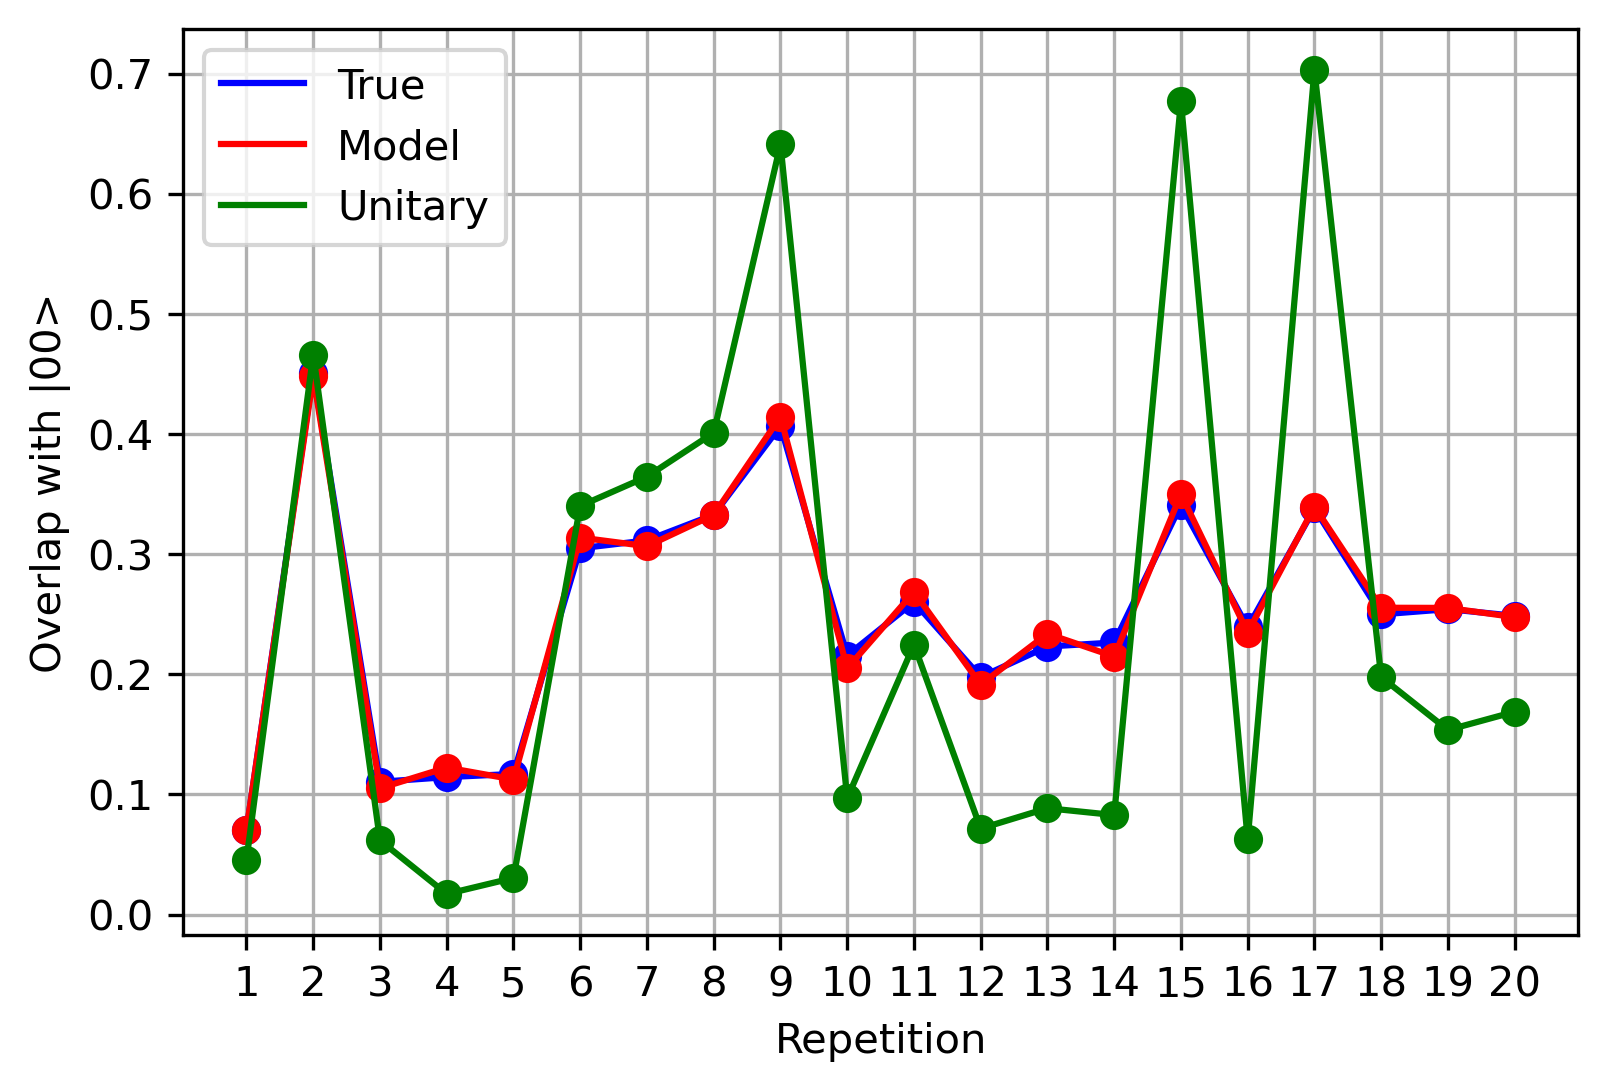

In [11]:
state_unitary = state_model = np.zeros((1, d,d))
state_unitary[0, 0, 0] = 1

state_unitary = tf.cast(state_unitary, dtype=tf.complex128)
state_model = tf.cast(state_model, dtype=tf.complex128)

observ = np.zeros((1, d))
observ[0, 0] = 1
observ = tf.cast(observ, dtype=tf.complex128)
model_expectation_list = []
unitary_expectation_list = []

probs = counts_to_probs(counts_list[324:])
                        
target_test = expectation_value(probs, observ).numpy()

for i in range(20):
    state_model = model.q_map.apply_map(state_model)
    probs = measurement(state_model, povm=model.q_map.povm)
    model_expectation_list.append(expectation_value(probs, observ))
    
    state_unitary = U@state_unitary@U.T.conj()
    unitary_expectation_list.append(expectation_value(measurement(state_unitary, povm=model.q_map.povm), observ))
    
fig=plt.figure(figsize=(6,4), dpi = 300, facecolor='w', edgecolor='k')
x = list(range(1,21))
plt.plot(x, target_test, "b-",  label="True")
plt.plot(x, target_test, "bo")

plt.plot(x, model_expectation_list, "r-", label="Model")
plt.plot(x, model_expectation_list, "ro")

plt.plot(x, unitary_expectation_list, "g-", label="Unitary")
plt.plot(x, unitary_expectation_list, "go")
plt.xlabel("Repetition")
plt.ylabel("Overlap with |00>")

plt.xticks(list(range(1,21)))
plt.legend()
plt.grid()
plt.show()

### Three Qubits

In [13]:
n = 3
d = 2**n
inputs, counts_list, povm_inputs, counts_povm_list = pickle.load(open("../../data/threeQubits_expectation_POVM.p", "rb"))
targets = counts_to_probs(counts_list[:5000])

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

U = Operator(variational_circuit(n).reverse_bits()).data



povm_targets = counts_to_probs(counts_povm_list)

povm_model = POVM(
                  d=d, 
                  optimizer = tf.optimizers.Adam(learning_rate=0.01)
                 )

In [14]:
povm_model.train(1000, povm_inputs, povm_targets, N = 216)

  0%|          | 0/1000 [00:00<?, ?it/s]

(1.4082537502505705-3.800319839324536e-17j)
(1.391723717898492-1.6528315825168782e-17j)
(1.375279431129392+7.146575821470319e-17j)
(1.358927392122881-1.9349135741220986e-18j)
(1.3426604874915105+6.197540605653615e-17j)
(1.3265009233222593+1.9637662550238624e-17j)
(1.3104478544144769+1.2691327917428371e-17j)
(1.294506271598307+1.0094955872338275e-17j)
(1.2786923277892328-6.660404350836389e-17j)
(1.2629979430946576+7.210178476618777e-18j)
(1.2474222941703563-2.156220184020972e-19j)
(1.2319840938906697+1.010036464220414e-17j)
(1.216677798803155-5.3785991063537224e-18j)
(1.201525996555457+5.4418470520097466e-18j)
(1.1864999589088743-1.226091296075435e-17j)
(1.1716229219702923+1.2814681279813311e-18j)
(1.156875037109784-5.551186459748802e-18j)
(1.1422685372851549-1.3682387403542276e-17j)
(1.1278097505284228+3.628025076632768e-17j)
(1.1134900195772075+3.03437058264637e-17j)
(1.0992956443299329+1.741019327420866e-17j)
(1.0852402050482353+1.4784322782279806e-17j)
(1.071313202215375+1.011400133

(0.011155871010596174-4.140125070820118e-18j)
(0.010898884816886818+9.988238051969376e-18j)
(0.010649385668612538-5.197662317637086e-18j)
(0.010407600861660241-1.647078888109683e-18j)
(0.010173025424035644-7.219410236260583e-19j)
(0.009945675901402357+1.0204708227631723e-17j)
(0.009725295756201914-1.9419176091090316e-18j)
(0.009511630413438667-3.769524819788376e-18j)
(0.00930442609409459+3.841698042001489e-18j)
(0.009103431046512962-4.2324112381026234e-18j)
(0.008908017758710491-2.7175269597946816e-18j)
(0.008718402693811965+7.872914632613942e-20j)
(0.008534087984258283+2.637901782669687e-18j)
(0.008355148290694213+2.4790567398247833e-18j)
(0.008181358485174687-1.4450998680826104e-18j)
(0.008012511358583196-1.0729470207959308e-18j)
(0.007848418590852193+2.062446224569238e-18j)
(0.007688910430944636-1.4706686490855018e-18j)
(0.0075337378745566124-8.975229086626478e-18j)
(0.007382753271469038+5.066604515813303e-19j)
(0.007236114761030581-5.7025485106134514e-18j)
(0.007093706116910327+4.5

(0.00110148754508694+9.183730143045444e-19j)
(0.0010945368891831975+4.0209086816300955e-19j)
(0.0010876542224351373-1.7917997817487268e-19j)
(0.0010808588686360004-8.5805633081780785e-19j)
(0.0010741495078640671-8.762017530196354e-19j)
(0.0010675247271421065-2.8527759307427736e-19j)
(0.001060983052415848+6.43964113428815e-20j)
(0.0010545221772037727-4.764797280398779e-19j)
(0.0010481417585426972-2.467967426091565e-18j)
(0.0010418408407828835+7.052887628675855e-19j)
(0.0010356184203567705-1.6763999335875578e-18j)
(0.0010294733951500081+3.4857365753952794e-19j)
(0.001023419802526935-9.859936650923134e-19j)
(0.001017441533785506-1.8136107858395243e-18j)
(0.0010115369844310982-1.756529687775293e-18j)
(0.0010057006386861753+2.118478592305667e-18j)
(0.0009999352217538533-4.80284085001894e-19j)
(0.0009942392704639996-9.294143977464473e-19j)
(0.0009885961109504+2.315019958154809e-18j)
(0.0009830204969416972+9.961247023543304e-19j)
(0.000977511190121047-1.2562994911110622e-18j)
(0.0009720670110

(0.0005465635750949674-1.1789396632515649e-18j)
(0.0005452425145670285+2.0928012388297321e-19j)
(0.0005439323774512931-9.471066867078554e-19j)
(0.0005426308033870789+6.514017268000387e-19j)
(0.0005413377181192838+1.208130464131682e-19j)
(0.0005400507179963362-5.363063937528933e-19j)
(0.0005387720577109212-8.713446074292842e-19j)
(0.0005375016290339897-4.733379298220455e-19j)
(0.0005362393201290586-2.9404029742287804e-19j)
(0.0005349845445991266-1.4763812081114592e-18j)
(0.0005337377584276572-1.1709497284369288e-18j)
(0.0005324988431266176+4.025222113144318e-20j)
(0.0005312676736092094-3.6181046713346268e-19j)
(0.0005300461901106977+1.2692259766833154e-18j)
(0.0005288322864944114-3.427924485402237e-20j)
(0.0005276259063030179+5.587178704214192e-19j)
(0.0005264270147402313+1.0937521960373149e-18j)
(0.0005252335127522745-1.458724862595938e-18j)
(0.0005240474464147036+9.597604261305975e-20j)
(0.0005228687518636879-9.847267523288186e-20j)
(0.0005216969794956585+3.146517271134659e-19j)
(0.00

(0.0003947979959362975+8.025045475404914e-20j)
(0.00039427448033553503+3.008944872040346e-19j)
(0.00039375314706302625-1.9611539260354335e-19j)
(0.0003932339771951368+1.2126064553584047e-19j)
(0.0003927167955954698+3.1985522272968947e-19j)
(0.0003922017622778029-4.301002618381766e-19j)
(0.00039168885276553327+1.3153177436659089e-19j)
(0.00039117803884850883+2.581761245051418e-19j)
(0.00039066929321062674-4.594661903476691e-19j)
(0.00039016261418263395+1.7137117438332536e-19j)
(0.0003896579913469233-1.7479649646468976e-19j)
(0.00038915543329469106+2.6281013417063863e-19j)
(0.00038865494237027583-3.7901673074575646e-20j)
(0.0003881565126284631-2.293302652655602e-19j)
(0.0003876601305069472-4.0294156935345086e-19j)
(0.00038716563893458804-4.198886610979497e-20j)
(0.0003866731707381272+1.3423564200080942e-19j)
(0.00038618270299601714-1.9094826253499164e-19j)
(0.0003856942099601689-2.870515039046098e-19j)
(0.0003852077081874725-1.0879719248578105e-19j)
(0.00038472314945213134-2.756870775347

(0.00032774860608158563-5.205895775192614e-20j)
(0.0003274767574592104+1.5025418002183792e-19j)
(0.0003272058375187049+8.504483259691386e-20j)
(0.0003269356797787043-3.187244927522901e-19j)
(0.00032666644430329075+1.2949579297947598e-19j)
(0.00032639813022872775+2.4720691467762934e-19j)
(0.00032613073500914003+1.638860298617195e-19j)
(0.00032586425423716185-1.6105088994685737e-19j)
(0.00032559868192001446-1.0509166523748063e-19j)
(0.00032533418026479136+1.7544447715908548e-19j)
(0.0003250705712589364+1.8276609111714788e-19j)
(0.0003248078477348098+1.4546502495910075e-19j)
(0.00032454600404744255+2.2384084536443885e-19j)
(0.00032428485453007223-6.678131119739937e-20j)
(0.00032402457786666117-2.1884765851316695e-19j)
(0.0003237651754866071+3.217261046750829e-20j)
(0.0003235066488337849+1.1228637816718048e-19j)
(0.0003232491783695914+4.851540212480728e-19j)
(0.00032299258038258214-2.765929972470353e-20j)
(0.00032273685203790335-7.351442694210875e-20j)
(0.000322481989206542+2.9969310240403

In [15]:
rank = d**2

kraus_model = KrausMap(
                       d = d, 
                       rank = rank,
                       povm = povm_model.povm,
#                        povm = povm_ideal(n)
                       )

model = ModelQuantumMap(
                        q_map = kraus_model,
                        loss = probs_loss,
                        optimizer = tf.optimizers.Adam(learning_rate=0.01),
                        )

In [16]:
model.train(inputs = inputs,
            targets = targets,
            inputs_val = inputs,
            targets_val = targets,
            num_iter = 1000,
            N = 500
            )

  0%|          | 0/1000 [00:00<?, ?it/s]

0 0.621510841103973
1 0.6426382237154871
2 0.5874367544339938
3 0.5785883767433757
4 0.6002011383866322
5 0.5879469964916335
6 0.5618205963618464
7 0.5606767145076628
8 0.5182991719458129
9 0.5438015352463598
10 0.5368060719433118
11 0.511145119061988
12 0.5164807026915142
13 0.5299070173521688
14 0.5083030676760202
15 0.5145065333790428
16 0.5210841381308133
17 0.5022994960147495
18 0.4856991000694959
19 0.4892060021928113
20 0.4860720957352761
21 0.4740846429853982
22 0.4790887527137212
23 0.4671280430062092
24 0.5027400682732516
25 0.4692302069943586
26 0.455733397205159
27 0.4194344136768341
28 0.4521709074096987
29 0.4350852776544904
30 0.4270391620428229
31 0.4331588898807126
32 0.3982578528726382
33 0.4096987600211788
34 0.4120321376825139
35 0.4059115381671212
36 0.37874610348704807
37 0.38993884297006237
38 0.3938453064292811
39 0.3884721183356321
40 0.3808221121177508
41 0.37625370103553935
42 0.384449682242765
43 0.3751086215267267
44 0.3856542699535721
45 0.3507562052116993

339 0.0014501404911721717
340 0.001475072579988653
341 0.0014553875502647863
342 0.0013560695628547276
343 0.0014393931637396995
344 0.0013552065276302575
345 0.0013813664198746001
346 0.001411599882463201
347 0.0014255587246235167
348 0.0014139231625953138
349 0.001351704168578749
350 0.0013783690720322221
351 0.0014040342841844953
352 0.0013728687880219719
353 0.00141631803363798
354 0.0013610209320847812
355 0.0013404909373189145
356 0.0013901724490110563
357 0.0013288156667341233
358 0.0014063280575533712
359 0.0013595917804021442
360 0.0013554959932976609
361 0.001341203957736896
362 0.001317060938766838
363 0.0013749694916175945
364 0.001292159643119637
365 0.0014298672953351448
366 0.001325063552858126
367 0.0013579897000666288
368 0.0013500633900796648
369 0.0013083414100472552
370 0.0012451071448105495
371 0.0012870448824228986
372 0.0013063629380191723
373 0.0012867655325150917
374 0.0012889476712779984
375 0.0012764470120901642
376 0.0012632299032754072
377 0.001276814770365

657 0.0009144371539594303
658 0.0008806422640527874
659 0.0008831332447459335
660 0.0008679210425214731
661 0.0008742791783313165
662 0.0009080782940400792
663 0.0008534668863411565
664 0.0008367319846965455
665 0.0008758231108663702
666 0.0008857776094177855
667 0.0008788043683404881
668 0.0008805711884623792
669 0.0008870394489858587
670 0.0008599546117254649
671 0.0008774583824261383
672 0.0009125661898051981
673 0.0008920759758384229
674 0.0008849347667180498
675 0.0008472955359395666
676 0.0008887791843114777
677 0.000872075738804657
678 0.0008509023121656963
679 0.0008533322707805046
680 0.0008470273388123578
681 0.0008690879076639842
682 0.0008775128309006359
683 0.0008472631466907743
684 0.0008354551288612042
685 0.0008513306455397493
686 0.000874599551029763
687 0.0008625112899231535
688 0.0008510529616996405
689 0.0008409510698053922
690 0.0008259673106393013
691 0.0008705473847037983
692 0.0008582234628331613
693 0.0008633351218413783
694 0.0008623189804147623
695 0.00084963

977 0.0008118841605317107
978 0.0007614816325276272
979 0.0007563925981010079
980 0.0007607760581041069
981 0.0007974526908668069
982 0.0007831412828817529
983 0.0007541819771308924
984 0.0007952491933725199
985 0.0008127985127438457
986 0.0007341881810236906
987 0.0007320338064352064
988 0.0007581511270800788
989 0.0007888943375480807
990 0.000751897274523404
991 0.0008114905257009219
992 0.0007409500379543112
993 0.0008219427592277183
994 0.0007916404890154706
995 0.0007888291163974993
996 0.0007815986675657446
997 0.0007580023646119434
998 0.0007819861666306152
999 0.0007601832397836744


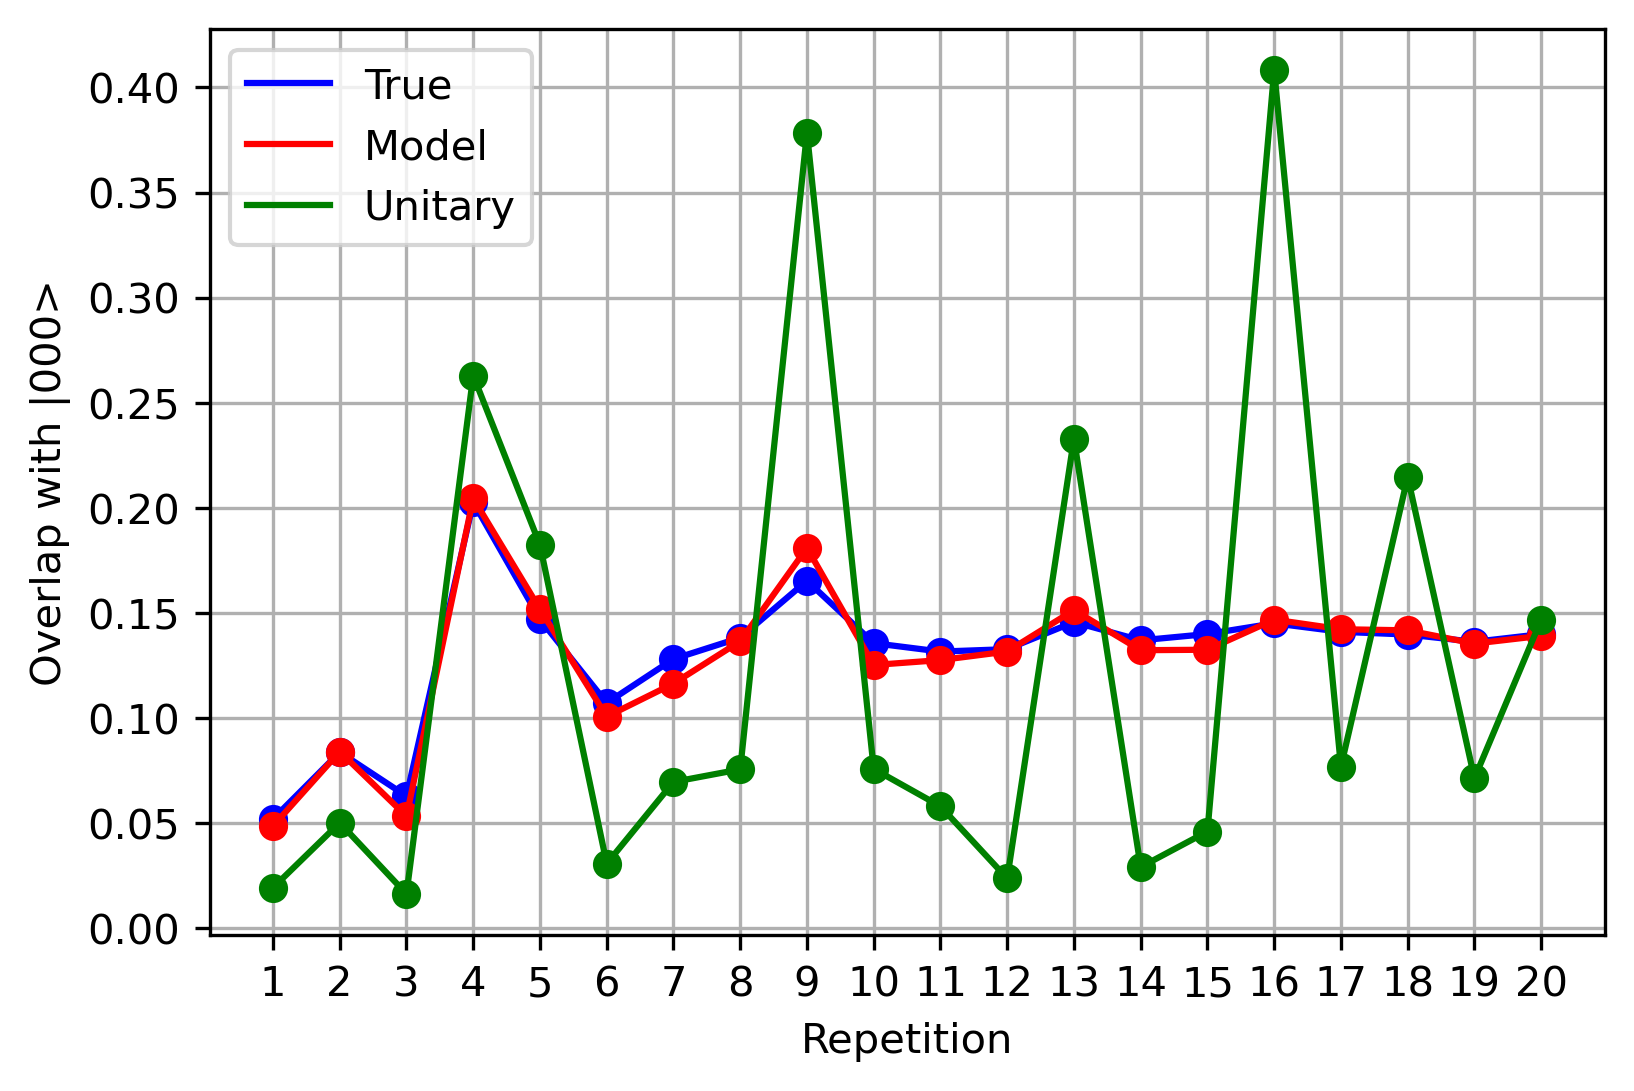

In [17]:
state_unitary = state_model = np.zeros((1, d,d))
state_unitary[0, 0, 0] = 1

state_unitary = tf.cast(state_unitary, dtype=tf.complex128)
state_model = tf.cast(state_model, dtype=tf.complex128)

observ = np.zeros((1, d))
observ[0, 0] = 1
observ = tf.cast(observ, dtype=tf.complex128)
model_expectation_list = []
unitary_expectation_list = []

probs = counts_to_probs(counts_list[5000:])
                        
target_test = expectation_value(probs, observ).numpy()

for i in range(20):
    state_model = model.q_map.apply_map(state_model)
    probs = measurement(state_model, povm=model.q_map.povm)
    model_expectation_list.append(expectation_value(probs, observ))
    
    state_unitary = U@state_unitary@U.T.conj()
    unitary_expectation_list.append(expectation_value(measurement(state_unitary, povm=model.q_map.povm), observ))
    
fig=plt.figure(figsize=(6,4), dpi = 300, facecolor='w', edgecolor='k')
x = list(range(1,21))
plt.plot(x, target_test, "b-",  label="True")
plt.plot(x, target_test, "bo")

plt.plot(x, model_expectation_list, "r-", label="Model")
plt.plot(x, model_expectation_list, "ro")

plt.plot(x, unitary_expectation_list, "g-", label="Unitary")
plt.plot(x, unitary_expectation_list, "go")
plt.xlabel("Repetition")
plt.ylabel("Overlap with |000>")

plt.xticks(list(range(1,21)))
plt.legend()
plt.grid()
plt.show()